In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\DSA 1060A\Group Project\archive\Mobile-Price-Prediction-cleaned_data.csv")

In [6]:
data

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


# Visualizing correlations

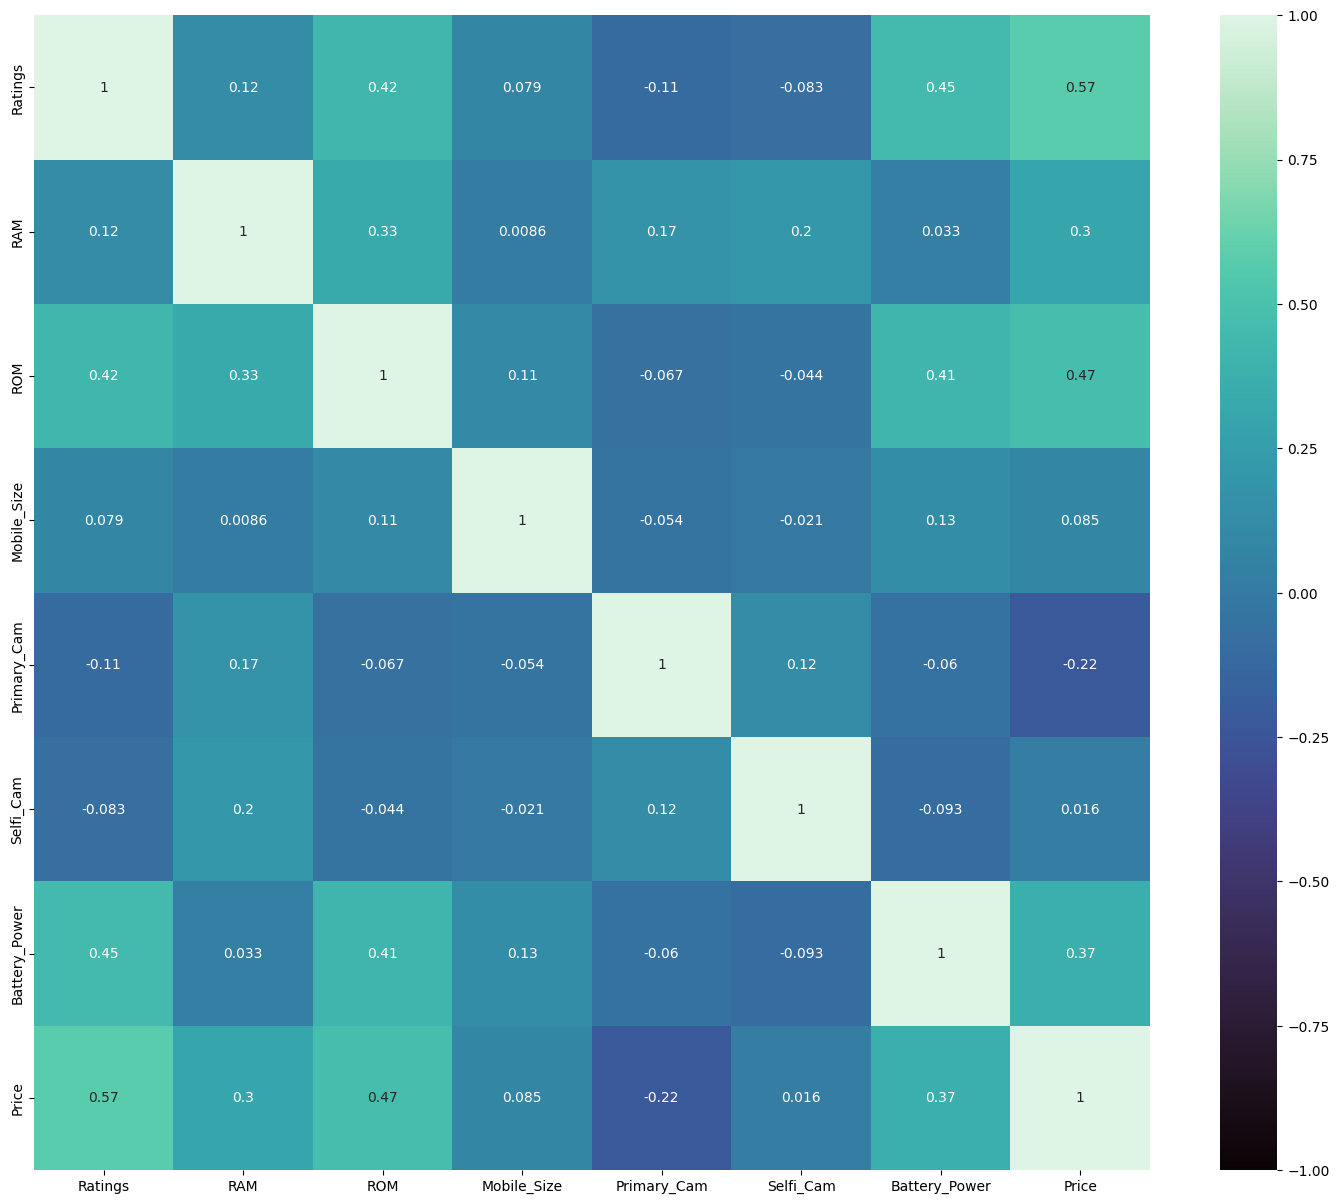

In [20]:
corr = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

# Splitting 

In [21]:
y = data['Price'].copy()
X = data.drop('Price', axis=1).copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

# Building Pipeline

In [23]:
pipe = Pipeline([('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())])

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

# Results

In [25]:
print("Accuracy:", pipe.score(X_test, y_test))

Accuracy: 0.20987654320987653


# Trying without Battery_Power Feature

In [32]:
data = data.drop('Battery_Power', axis=1)

y = data['Price'].copy()
X = data.drop('Price', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

pipe.fit(X_train, y_train)

print("Accuracy:", pipe.score(X_test, y_test))

Accuracy: 0.13580246913580246


Case Study: Optimizing Mobile Phone Pricing Strategy
Scenario: A mobile phone company wanted to optimize its pricing strategy for a new range of smartphones. The company aimed to set competitive prices while ensuring profitability and market positioning.

Objective: Predict the prices of mobile phones based on various features and specifications to guide pricing decisions and marketing strategies.

Data Collection: The company gathered data on various features of mobile phones, including:

Battery power
Bluetooth connectivity
Clock speed
Dual SIM capability
Front and rear camera specifications
Internal memory
RAM
Screen resolution
Price
Data Analysis:

Feature Selection: Initially, all features were considered. However, after initial modeling and accuracy assessment, the company identified key features contributing significantly to the price prediction.
Modeling: Various machine learning models were tested, including Logistic Regression with feature scaling. The models were evaluated based on their accuracy in predicting the correct price range of the phones.
Results: The final model demonstrated an accuracy of approximately 21%, indicating a reasonable predictive capability but also highlighting areas for improvement, such as more refined feature engineering or more sophisticated modeling techniques.
Insights and Actions:

Key Features Identification: The analysis highlighted that features like RAM, battery power, and camera specifications significantly influenced the phone's price. This insight guided the marketing team to emphasize these features in promotional materials.
Pricing Strategy: The predictive model provided a framework for setting prices within competitive ranges, ensuring the products were positioned appropriately against competitors.
Targeted Marketing: By understanding which features contributed most to the price, the company could tailor its marketing messages to highlight these aspects, attracting customers who value these specific features.
Outcome:
The data-driven approach allowed the company to make informed pricing decisions, optimizing their strategy for market competitiveness. Additionally, the insights gained from the analysis helped in crafting more targeted marketing campaigns, ultimately leading to better customer engagement and sales performance.

This case study illustrates the practical application of data science in the marketing industry, showcasing how predictive analytics can inform pricing strategies and enhance marketing effectiveness.